In [164]:
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# !usr/bin/bash
#!/usr/bin/bash


In [5]:
!micromamba env list

/bin/bash: line 1: micromamba: command not found


In [ ]:
# f_nano = "root://redirector.t2.ucsd.edu//store/user/hmei/nanoaod_runII/HHggtautau/ttHJetToGG_M125_13TeV_amcatnloFXFX_madspin_pythia8_RunIIFall17MiniAODv2-PU2017_12Apr2018_94X_mc2017_realistic_v14-v1_MINIAODSIM_v0.6_20201021/test_nanoaod_1.root"


In [ ]:
# fname = "/eos/cms/store/group/phys_higgs/cmshgg/tutorials/HiggsDNA_FinalFits_2024/HiggsDNA_part/01_intro/ggh_M-125_preEE/5d677ef6-111a-428f-a78c-7ae0f68fd140.root"


In [2]:
fname = '0817B8ED-5E38-1B4A-B088-914CFFE7DC5E.root'

In [116]:
with uproot.open(fname, timeout=120) as Hfile:
    print(Hfile.keys())
    Tree = Hfile["Events"]  # can access TTrees by name
    Tree_2 = Hfile["Runs"]  # can access TTrees by name
    Events = Tree.arrays(library="ak", how="zip")
    Runs = Tree_2.arrays(library="ak", how="zip")
    # tree_2 = f2["sig_tree"] # can access TTrees by name
    # events_2 = tree_2.arrays(library = "ak", how = "zip")
    # events_2 = tree_2.arrays(library="ak", how="zip")

['tag;1', 'Events;1', 'LuminosityBlocks;1', 'Runs;1', 'MetaData;1', 'ParameterSets;1']


In [136]:
len(Events)

24000

In [37]:
Runs.fields

['run',
 'genEventCount',
 'genEventSumw',
 'genEventSumw2',
 'nLHEScaleSumw',
 'nLHEPdfSumw',
 'jagged0',
 'jagged1']

In [40]:
Runs['genEventCount']

<Array [24000] type='1 * int64'>

In [154]:
Events.fields[:100]

['run',
 'luminosityBlock',
 'event',
 'HTXS_Higgs_pt',
 'HTXS_Higgs_y',
 'HTXS_stage1_1_cat_pTjet25GeV',
 'HTXS_stage1_1_cat_pTjet30GeV',
 'HTXS_stage1_1_fine_cat_pTjet25GeV',
 'HTXS_stage1_1_fine_cat_pTjet30GeV',
 'HTXS_stage1_2_cat_pTjet25GeV',
 'HTXS_stage1_2_cat_pTjet30GeV',
 'HTXS_stage1_2_fine_cat_pTjet25GeV',
 'HTXS_stage1_2_fine_cat_pTjet30GeV',
 'HTXS_stage_0',
 'HTXS_stage_1_pTjet25',
 'HTXS_stage_1_pTjet30',
 'HTXS_njets25',
 'HTXS_njets30',
 'nboostedTau',
 'btagWeight_CSVV2',
 'btagWeight_DeepCSVB',
 'CaloMET_phi',
 'CaloMET_pt',
 'CaloMET_sumEt',
 'ChsMET_phi',
 'ChsMET_pt',
 'ChsMET_sumEt',
 'nCorrT1METJet',
 'DeepMETResolutionTune_phi',
 'DeepMETResolutionTune_pt',
 'DeepMETResponseTune_phi',
 'DeepMETResponseTune_pt',
 'nElectron',
 'nFatJet',
 'nFsrPhoton',
 'nGenJetAK8',
 'nGenJet',
 'nGenPart',
 'nSubGenJetAK8',
 'Generator_binvar',
 'Generator_scalePDF',
 'Generator_weight',
 'Generator_x1',
 'Generator_x2',
 'Generator_xpdf1',
 'Generator_xpdf2',
 'Generator_id1'

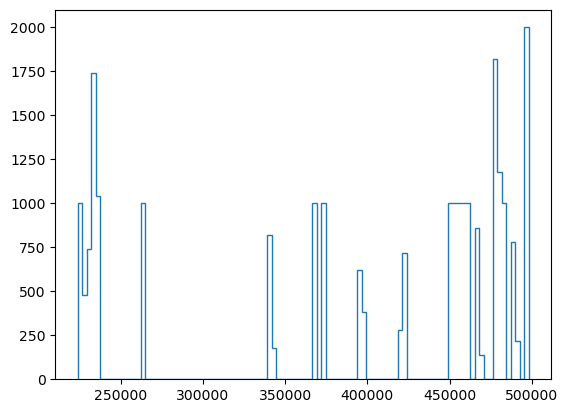

In [117]:
plt.hist(Events['event'], bins=100, histtype='step', label='Events');

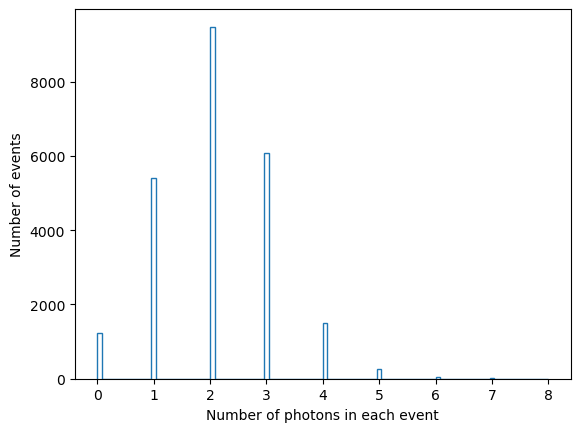

In [118]:
plt.hist(Events['nPhoton'], bins=100, histtype='step', label='Events');
plt.xlabel('Number of photons in each event');
plt.ylabel('Number of events');

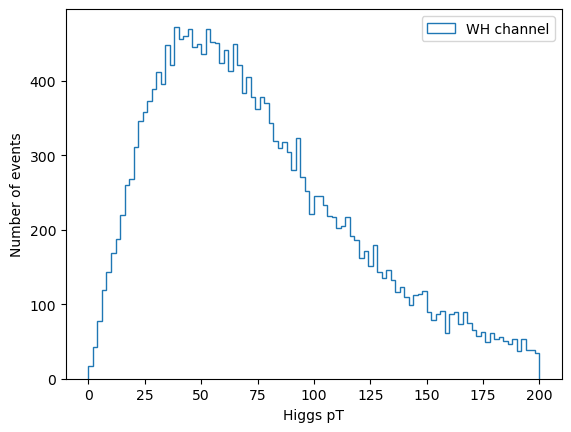

In [119]:
plt.hist(Events['HTXS_Higgs_pt'], range=(0, 200), bins=100, histtype='step', label='WH channel');
plt.xlabel('Higgs pT');
plt.ylabel('Number of events');
plt.legend()

In [156]:
all_keys = Events.fields

# Filter keys containing "Gen"
gen_keys = [k for k in all_keys if "Gen" in k]

print(gen_keys)

['nGenJetAK8', 'nGenJet', 'nGenPart', 'nSubGenJetAK8', 'Generator_binvar', 'Generator_scalePDF', 'Generator_weight', 'Generator_x1', 'Generator_x2', 'Generator_xpdf1', 'Generator_xpdf2', 'Generator_id1', 'Generator_id2', 'GenVtx_x', 'GenVtx_y', 'GenVtx_z', 'nGenVisTau', 'GenMET_phi', 'GenMET_pt', 'nGenDressedLepton', 'nGenIsolatedPhoton', 'GenVtx_t0', 'MET_fiducialGenPhi', 'MET_fiducialGenPt', 'GenJetAK8', 'GenJet', 'GenPart', 'SubGenJetAK8', 'GenVisTau', 'GenDressedLepton', 'GenIsolatedPhoton']


In [160]:
pdgId = Events.GenPart.pdgId
is_higgs = pdgId == 25

# Higgs count per event
n_higgs_per_event = ak.sum(is_higgs, axis=1)

# Total Higgs count across all events
total_higgs = ak.sum(is_higgs)

print("Max Higgs in any event:", ak.max(n_higgs_per_event))
print("Events with at least one Higgs:", ak.sum(n_higgs_per_event > 0))
print("Total number of Higgs in all events:", total_higgs)



Max Higgs in any event: 16
Events with at least one Higgs: 24000
Total number of Higgs in all events: 129759


In [137]:
genparts = Events.GenPart
is_higgs = (abs(genparts.pdgId) == 25)

higgs = genparts[is_higgs]

higgs_pt = ak.flatten(higgs.pt)
higgs_eta = ak.flatten(higgs.eta)
higgs_phi = ak.flatten(higgs.phi)

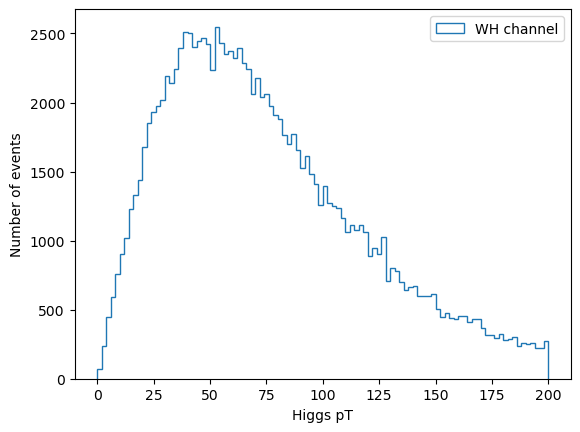

In [144]:
plt.hist(higgs_pt, bins=100, range = (0,200),histtype='step', label = 'WH channel');
plt.xlabel('Higgs pT');
plt.ylabel('Number of events');
plt.legend()

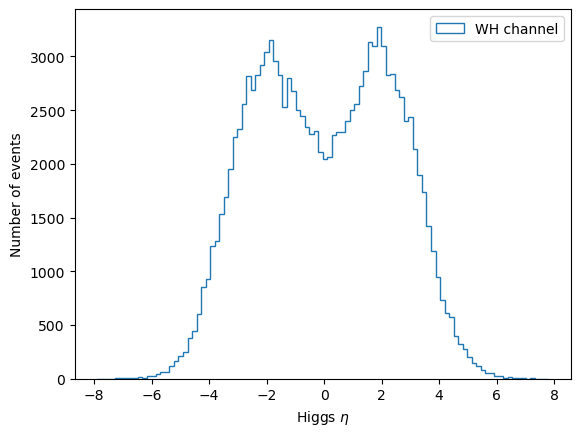

In [149]:
plt.hist(higgs_eta, bins=100,histtype='step', label = 'WH channel');
plt.xlabel(r'Higgs $\eta$');
plt.ylabel('Number of events');
plt.legend()

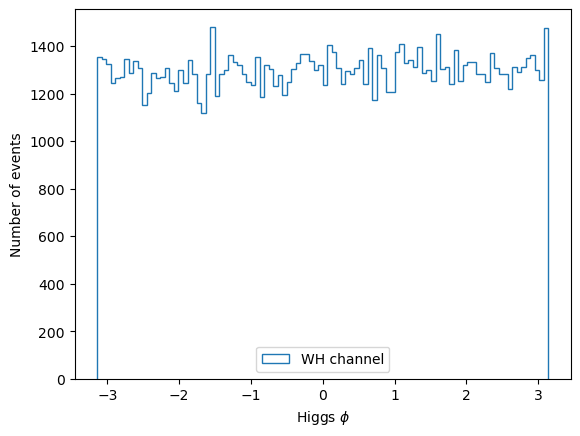

In [150]:
plt.hist(higgs_phi, bins=100,histtype='step', label = 'WH channel');
plt.xlabel(r'Higgs $\phi$');
plt.ylabel('Number of events');
plt.legend()

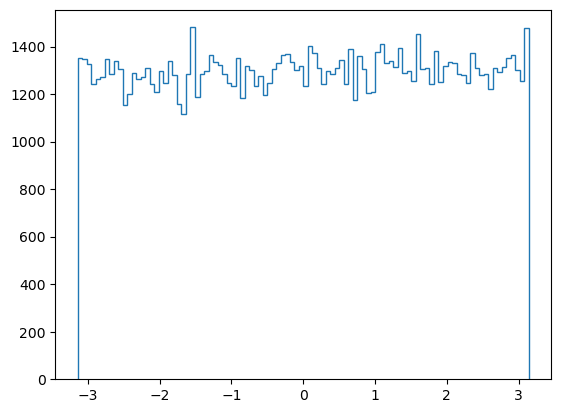

In [142]:
plt.hist(higgs_phi, bins=100,histtype='step', label = 'Higgs $p_T$');

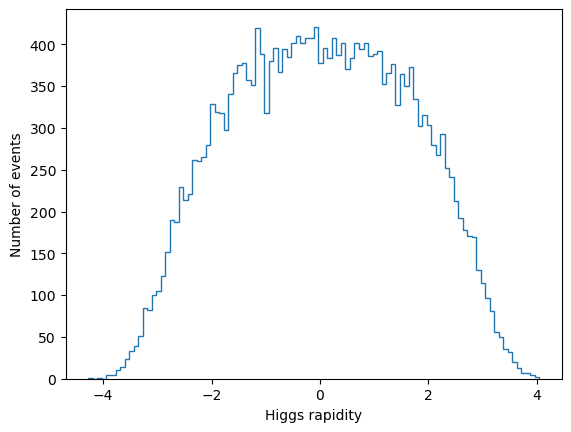

In [120]:
plt.hist(Events['HTXS_Higgs_y'], bins=100, histtype='step', label='Events');
plt.xlabel('Higgs rapidity');
plt.ylabel('Number of events');

In [152]:
Events['HTXS_Higgs_y']

<Array [-3.08, -1.25, ... -0.829, 0.0686] type='24000 * float32'>

In [34]:
# plt.hist(Events['Photon'], bins=100, histtype='step', label='Events');

In [18]:
Events['HLT_Photon500']

<Array [False, False, False, ... False, False] type='1000 * bool'>

In [50]:
Events['Photon'][2]

<Array [{dEscaleDown: 0, ... cleanmask: 1}] type='4 * {"dEscaleDown": float32, "...'>

In [122]:
photon_pts = Events["Photon"]["pt"]
# leading_photon_pt = photon_pts[:, 0]  # Be careful: this will error if some events have no photons


In [123]:
photon_etas = Events["Photon"]["eta"]

In [124]:
photon_phis = Events["Photon"]["phi"]

In [125]:
photon_phi = ak.flatten(photon_phis)

In [126]:
photon_eta = ak.flatten(photon_etas)

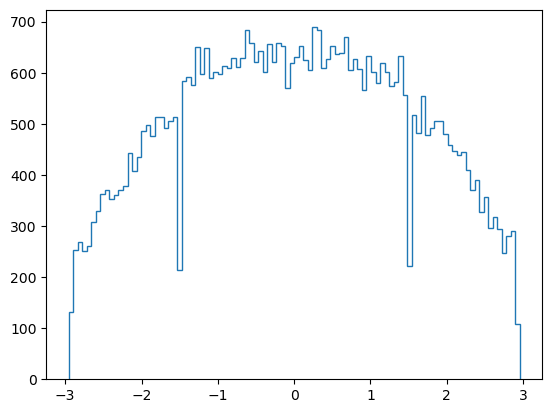

In [127]:
plt.hist(photon_eta, bins=100, histtype='step', label='Events');

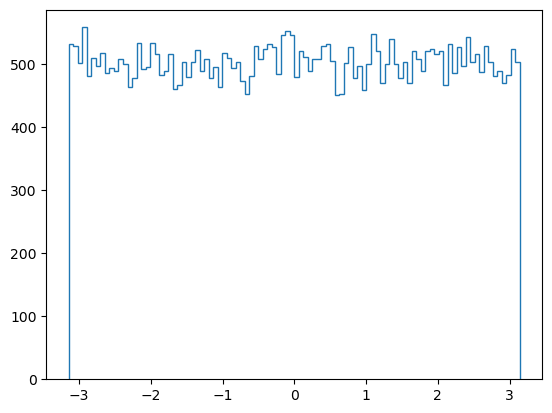

In [128]:
plt.hist(photon_phi, bins=100, histtype='step', label='Events');

In [57]:
ak.num(photon_pts) 

<Array [0, 1, 4, 2, 3, 3, ... 4, 2, 2, 3, 3, 1] type='1000 * int64'>

In [129]:
# Sort photon pts in descending order within each event
sorted_pts = ak.sort(photon_pts, axis=-1, ascending=False)
sorted_pts# Now extract leading and subleading photon pts
leading_pts = ak.firsts(sorted_pts[ak.num(sorted_pts) >= 2])
sublead_pts = sorted_pts[ak.num(sorted_pts) >= 2][:, 1]




In [77]:
leading_pts

<Array [46.9, 45.8, 30.6, ... 175, 50.9, 41.9] type='719 * ?float32'>

In [78]:
sublead_pts

<Array [44, 14.1, 16.7, ... 16.4, 36, 40.4] type='719 * float32'>

In [74]:
photon_pts[4]

<Array [30.6, 16.7, 12.7] type='3 * float32'>

In [72]:
sorted_pts

<Array [[], [38.8], ... 40.4, 20.9], [83.2]] type='1000 * var * float32'>

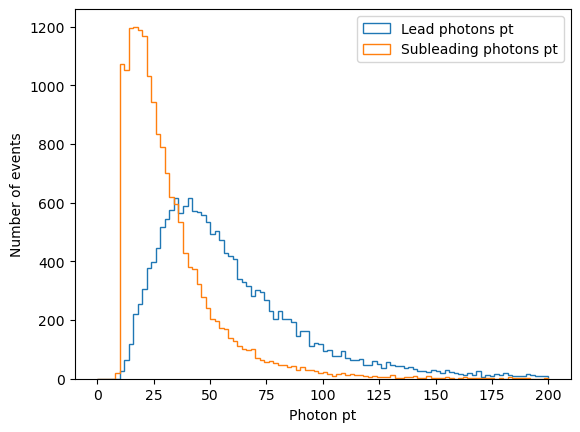

In [130]:
plt.hist(leading_pts, bins=100, range= (0,200),histtype='step', label='Lead photons pt');
plt.hist(sublead_pts, bins=100, range= (0,200),histtype='step', label='Subleading photons pt');
plt.xlabel('Photon pt');
plt.ylabel('Number of events');
plt.legend();

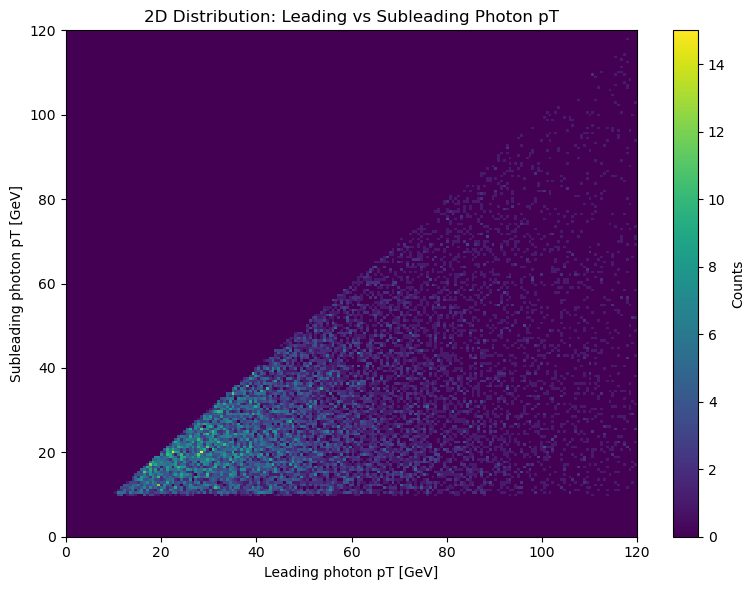

In [175]:
# Convert awkward arrays to flat NumPy arrays
leading_pts_np = ak.to_numpy(leading_pts)
sublead_pts_np = ak.to_numpy(sublead_pts)

# Plot 2D histogram
plt.figure(figsize=(8, 6))
plt.hist2d(leading_pts_np, sublead_pts_np, bins=200, range=[[0, 120], [0, 120]], cmap='viridis')
plt.colorbar(label='Counts')
plt.xlabel('Leading photon pT [GeV]')
plt.ylabel('Subleading photon pT [GeV]')
plt.title('2D Distribution: Leading vs Subleading Photon pT')
# plt.grid(True)
plt.tight_layout()
plt.show()

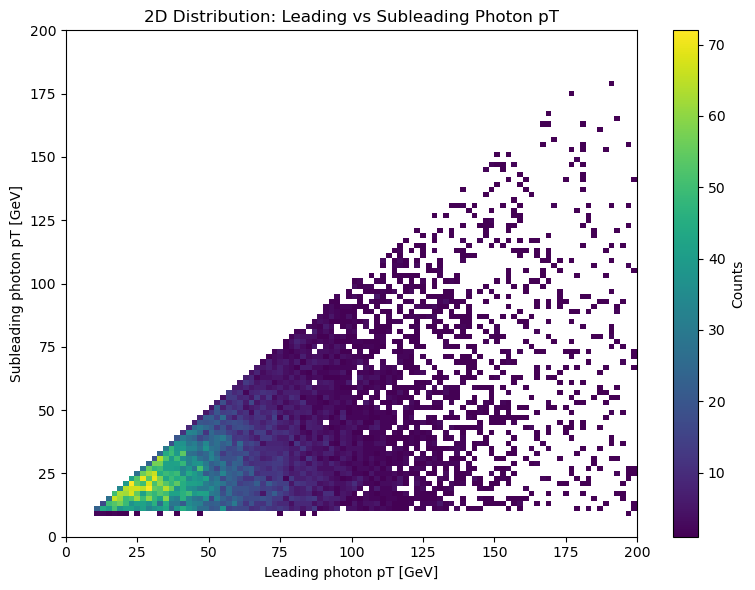

In [176]:
# Convert awkward arrays to NumPy
leading_pts_np = ak.to_numpy(leading_pts)
sublead_pts_np = ak.to_numpy(sublead_pts)

# Create 2D histogram manually to access bin counts
hist, xedges, yedges = np.histogram2d(leading_pts_np, sublead_pts_np, bins=100, range=[[0, 200], [0, 200]])

# Set up colormap: white for zero counts
from matplotlib.colors import ListedColormap
cmap = plt.cm.viridis
cmap.set_under('white')  # bins with 0 count will use this color

# Plot
plt.figure(figsize=(8, 6))
plt.pcolormesh(xedges, yedges, hist.T, cmap=cmap, vmin=1)  # vmin=1 to activate "under"
plt.colorbar(label='Counts')
plt.xlabel('Leading photon pT [GeV]')
plt.ylabel('Subleading photon pT [GeV]')
plt.title('2D Distribution: Leading vs Subleading Photon pT')
plt.grid(False)
plt.tight_layout()
plt.show()

In [131]:
pt_sorted_idx = ak.argsort(photon_pts, axis=1, ascending=False)
sorted_eta = photon_etas[pt_sorted_idx]
sorted_phi = photon_phis[pt_sorted_idx]

In [132]:
# Select events with at least 2 photons
has_two_or_more = ak.num(sorted_eta) >= 2

# Filter sorted_eta/phi to only those events
filtered_eta = sorted_eta[has_two_or_more]
filtered_phi = sorted_phi[has_two_or_more]

# Now safely take leading and subleading from same filtered set
leading_eta = filtered_eta[:, 0]
subleading_eta = filtered_eta[:, 1]

leading_phi = filtered_phi[:, 0]
subleading_phi = filtered_phi[:, 1]


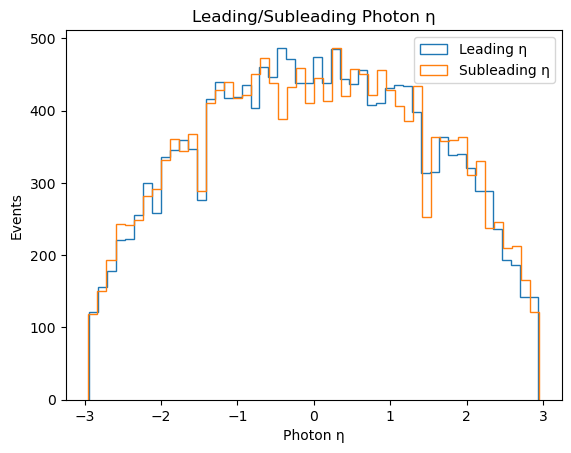

In [133]:
plt.hist(ak.to_numpy(leading_eta), bins=50, histtype='step',  label="Leading η")
plt.hist(ak.to_numpy(subleading_eta), bins=50, histtype='step', label="Subleading η")
plt.xlabel("Photon η")
plt.ylabel("Events")
plt.legend()
plt.title("Leading/Subleading Photon η")
plt.show()


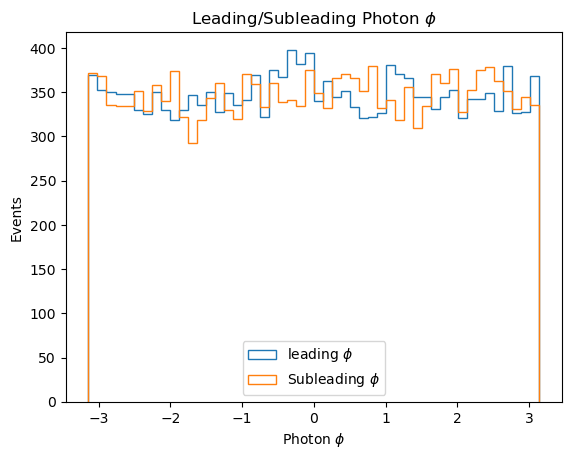

In [134]:
plt.hist(ak.to_numpy(leading_phi), bins=50, histtype='step',  label=r"leading $\phi$")
plt.hist(ak.to_numpy(subleading_phi), bins=50, histtype='step', label=r"Subleading $\phi$")
plt.xlabel(r"Photon $\phi$")
plt.ylabel("Events")
plt.legend()
plt.title(r"Leading/Subleading Photon $\phi$")
plt.show()

In [161]:
jets = Events['Jet']

In [162]:
jets.btagDeepFlavB

<Array [[0.0155, 0.0669, ... 0.0621, 0.0703]] type='24000 * var * float32'>

In [165]:
# Count number of jets with b/c/light flavor
print("b-jets:", ak.sum(jets.hadronFlavour == 5))
print("c-jets:", ak.sum(jets.hadronFlavour == 4))
print("light/unmatched:", ak.sum(jets.hadronFlavour == 0))

# Or see the unique values
# print("Unique hadronFlavour values:", ak.to_list(ak.unique(ak.flatten(jets.hadronFlavour))))
# Flatten first, then use numpy's unique
unique_flavours = np.unique(ak.to_numpy(ak.flatten(jets.hadronFlavour)))
print("Unique hadronFlavour values:", unique_flavours)

b-jets: 25583
c-jets: 3260
light/unmatched: 101912
Unique hadronFlavour values: [0 4 5]


In [166]:
btag_cut = 0.6502
bjets = jets[jets.btagDeepFlavB > btag_cut]

In [167]:
len(bjets)

24000

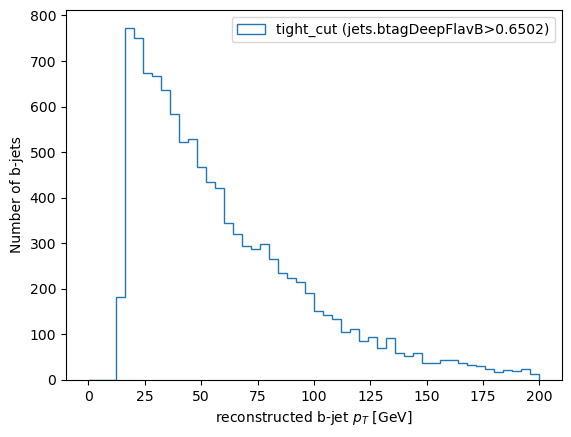

In [168]:
plt.hist(ak.flatten(bjets['pt']), bins=50, range = (0,200),histtype='step', label = 'tight_cut (jets.btagDeepFlavB>0.6502)');
plt.xlabel('reconstructed b-jet $p_T$ [GeV]')
plt.ylabel('Number of b-jets')
plt.legend()

Text(0, 0.5, 'Number of b-jets')

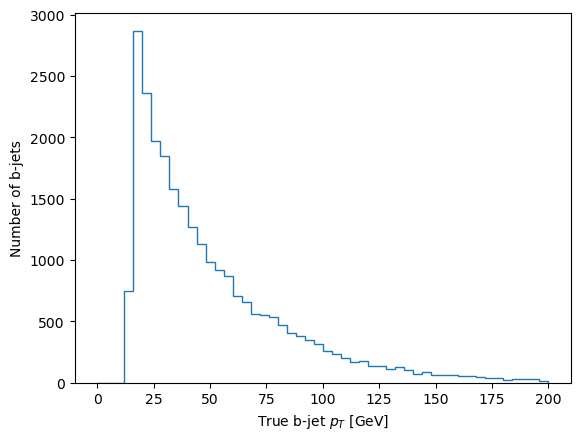

In [169]:
bjets_Gen = jets[jets.hadronFlavour == 5]
plt.hist(ak.flatten(bjets_Gen['pt']), bins=50, range = (0,200),histtype='step');
plt.xlabel('True b-jet $p_T$ [GeV]')
plt.ylabel('Number of b-jets')

In [ ]:
# Count number of jets with b/c/light flavor
print("b-jets:", ak.sum(jets.hadronFlavour == 5))
print("c-jets:", ak.sum(jets.hadronFlavour == 4))
print("light/unmatched:", ak.sum(jets.hadronFlavour == 0))

# Or see the unique values
# print("Unique hadronFlavour values:", ak.to_list(ak.unique(ak.flatten(jets.hadronFlavour))))
# Flatten first, then use numpy's unique
unique_flavours = np.unique(ak.to_numpy(ak.flatten(jets.hadronFlavour)))
print("Unique hadronFlavour values:", unique_flavours)

In [ ]:
# mask = ak.num(Photonpta) >= 2
# Photonpta[mask]  # array of photon pts for only such events

In [52]:
photon_pts

<Array [[], [38.8], ... 40.4, 20.9], [83.2]] type='1000 * var * float32'>

In [27]:
Events['HLT_DoublePhoton60']

<Array [False, False, False, ... False, False] type='1000 * bool'>

In [8]:
print(Events['run'][:10])
print(Events['luminosityBlock'][:10])
print(Events['event'][:10])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[236, 236, 236, 236, 236, 236, 236, 236, 236, 236]
[235003, 235008, 235006, 235004, 235009, 235001, 235007, 235011, 235005, 235010]


In [12]:
events_2.fields

['run',
 'luminosityBlock',
 'event',
 'bunchCrossing',
 'HTXS_njets25',
 'HTXS_njets30',
 'HTXS_stage1_1_cat_pTjet25GeV',
 'HTXS_stage1_1_cat_pTjet30GeV',
 'HTXS_stage1_1_fine_cat_pTjet25GeV',
 'HTXS_stage1_1_fine_cat_pTjet30GeV',
 'HTXS_stage1_2_cat_pTjet25GeV',
 'HTXS_stage1_2_cat_pTjet30GeV',
 'HTXS_stage1_2_fine_cat_pTjet25GeV',
 'HTXS_stage1_2_fine_cat_pTjet30GeV',
 'HTXS_stage_0',
 'HTXS_stage_1_pTjet25',
 'HTXS_stage_1_pTjet30',
 'HTXS_Higgs_pt',
 'HTXS_Higgs_y',
 'BeamSpot_type',
 'BeamSpot_sigmaZ',
 'BeamSpot_sigmaZError',
 'BeamSpot_z',
 'BeamSpot_zError',
 'nboostedTau',
 'CaloMET_phi',
 'CaloMET_pt',
 'CaloMET_sumEt',
 'ChsMET_phi',
 'ChsMET_pt',
 'ChsMET_sumEt',
 'nCorrT1METJet',
 'DeepMETResolutionTune_phi',
 'DeepMETResolutionTune_pt',
 'DeepMETResponseTune_phi',
 'DeepMETResponseTune_pt',
 'nElectron',
 'nFatJet',
 'nFsrPhoton',
 'nGenJetAK8',
 'nGenJet',
 'nGenPart',
 'nGenProton',
 'nSubGenJetAK8',
 'Generator_id1',
 'Generator_id2',
 'Generator_binvar',
 'Generator_

In [13]:
# Higgs_data = "Higgs_data.root"
with uproot.open(Higgs_data, timeout=120) as f:
    print(f.keys())

['sig_tree;1', 'bkg_tree;1']


In [31]:
with uproot.open(Higgs_data, timeout=120) as f:
    tree = f["sig_tree"] # can access TTrees by name
    events = tree.arrays(library = "ak", how = "zip")
    events = tree.arrays(library="ak", how="zip")

In [36]:
tree.keys()

['Type',
 'lepton_pT',
 'lepton_eta',
 'lepton_phi',
 'missing_energy_magnitude',
 'missing_energy_phi',
 'jet1_pt',
 'jet1_eta',
 'jet1_phi',
 'jet1_b-tag',
 'jet2_pt',
 'jet2_eta',
 'jet2_phi',
 'jet2_b-tag',
 'jet3_pt',
 'jet3_eta',
 'jet3_phi',
 'jet3_b-tag',
 'jet4_pt',
 'jet4_eta',
 'jet4_phi',
 'jet4_b-tag',
 'm_jj',
 'm_jjj',
 'm_lv',
 'm_jlv',
 'm_bb',
 'm_wbb',
 'm_wwbb']

In [27]:
rMp = events_2["Generator_x1"]

(array([269., 118.,  95.,  72.,  45.,  48.,  45.,  33.,  27.,  30.,  14.,
         29.,  14.,  17.,  13.,  13.,  12.,   7.,   9.,   2.,   4.,   3.,
          6.,   6.,   3.,   6.,   4.,   3.,   2.,   1.,   4.,   1.,   2.,
          4.,   2.,   0.,   5.,   2.,   4.,   0.,   0.,   1.,   5.,   2.,
          2.,   0.,   2.,   0.,   0.,   0.,   1.,   1.,   1.,   1.,   0.,
          2.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([1.91166997e-04, 7.31083751e-03, 1.44305080e-02, 2.15501785e-02,
        2.86698490e-02, 3.57895195e-02, 4.29091901e-02, 5.00288606e-02,
        5.71485311e-02, 6.42682016e-02, 7.13878721e-02, 7.85075426e-02,
        8.56272131e-02, 9.27468836e-02, 9.98665541e-02, 1.06986225e-01,
        1.14105895e-01, 1.2122

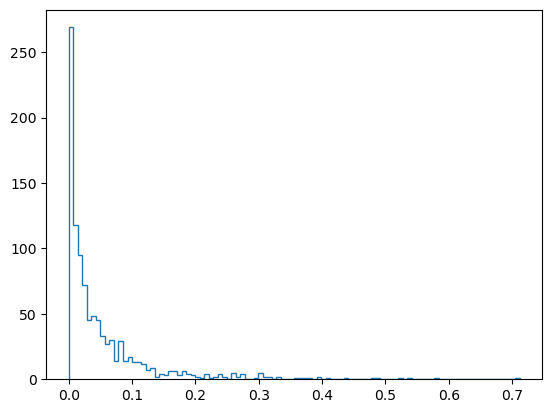

In [28]:
plt.hist(rMp, bins=100, histtype='step', label='RawMET_phi')

In [33]:
len(events)

10000

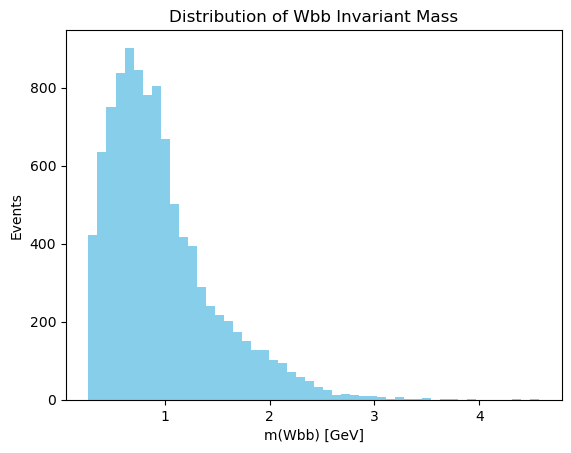

In [43]:
import awkward as ak

# Assuming `events` is your awkward array of records
m_wbb_array = events["lepton_pT"]

# Apply a cut
# mask = m_wbb_array > 0.9
# selected_events = events[mask]

# Or plot
import matplotlib.pyplot as plt
plt.hist(ak.to_numpy(m_wbb_array), bins=50, color='skyblue')
plt.xlabel("m(Wbb) [GeV]")
plt.ylabel("Events")
plt.title("Distribution of Wbb Invariant Mass")
plt.show()


In [35]:
print(m_wbb_array[:10])

[0.989, 0.992, 0.866, 0.872, 0.977, 0.894, 3.53, 0.937, 0.783, 0.929]
